Task 2: Customer Segmentation Using Unsupervised Learning
1. Problem Statement and Objective
Problem Statement

Shopping malls collect customer data but often fail to use it effectively. Without proper segmentation, marketing campaigns remain generic and inefficient.

Objective

The objective of this task is to segment customers based on their spending behavior using unsupervised learning (K-Means clustering) and propose targeted marketing strategies for each customer segment.

2. Dataset Description and Loading
Dataset Description

The Mall Customers Dataset contains information about customers visiting a mall.

Features:

CustomerID: Unique customer identifier

Gender: Male or Female

Age: Age of the customer

Annual Income (k$): Annual income in thousands

Spending Score (1–100): Spending behavior score

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Mall Customers.csv")

# Display first few rows
df.head()


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


3. Data Cleaning and Preprocessing
  3.1 Check Dataset Structure

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


3.2 Check for Missing Values

In [5]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

3.3 Feature Selection

For clustering, we select:

Annual Income

Spending Score

In [6]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


3.4 Feature Scaling

Standardization is necessary for K-Means.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


4. Exploratory Data Analysis (EDA)

4.1 Gender Distribution

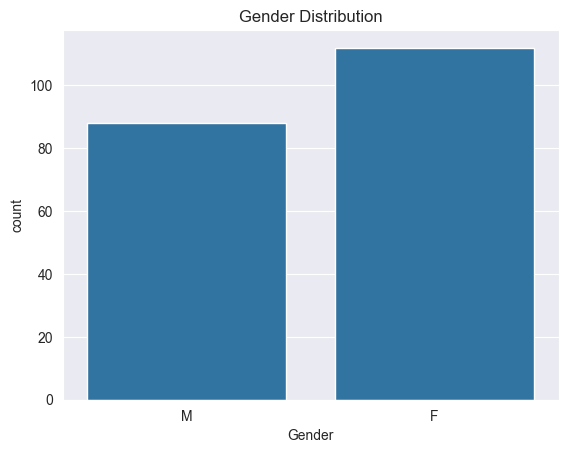

In [8]:
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()


4.2 Age Distribution

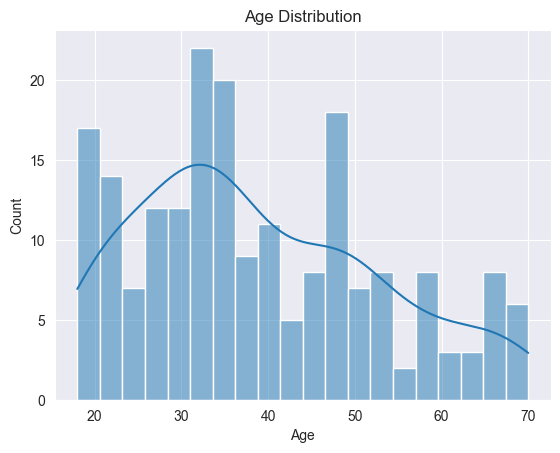

In [9]:
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


4.3 Income vs Spending Score

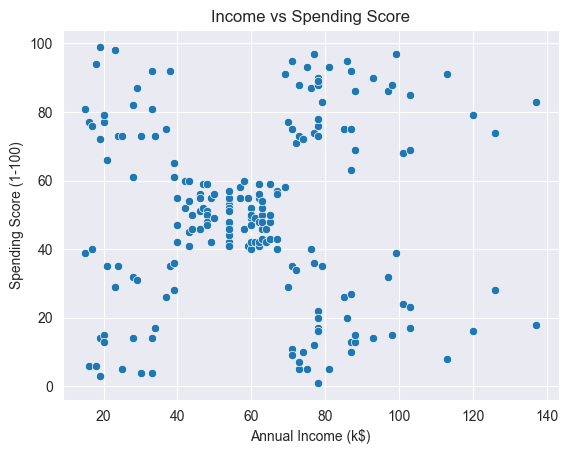

In [10]:
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    data=df
)
plt.title("Income vs Spending Score")
plt.show()


5. Model Building and Evaluation
5.1 Finding Optimal Clusters (Elbow Method)

In [21]:
from sklearn.cluster import KMeans

wcss= []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


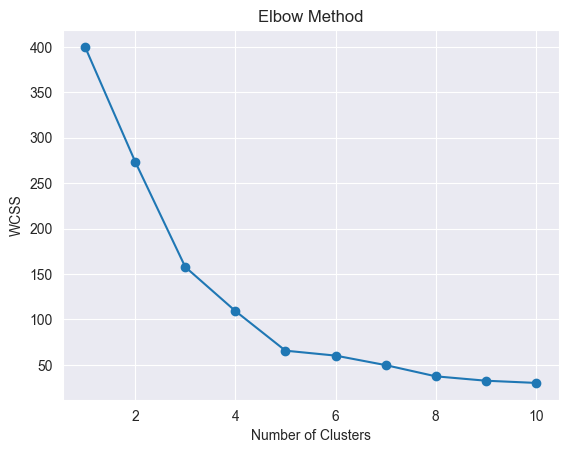

In [12]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


5.2 Apply K-Means Clustering

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


6. Visualizations (Charts, Plots, Graphs)
6.1 Cluster Visualization (Original Features)
7.

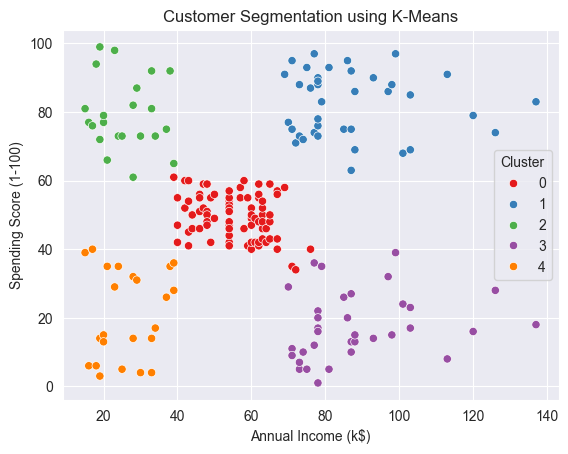

In [14]:
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set1",
    data=df
)
plt.title("Customer Segmentation using K-Means")
plt.show()


6.2 PCA Visualization

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]


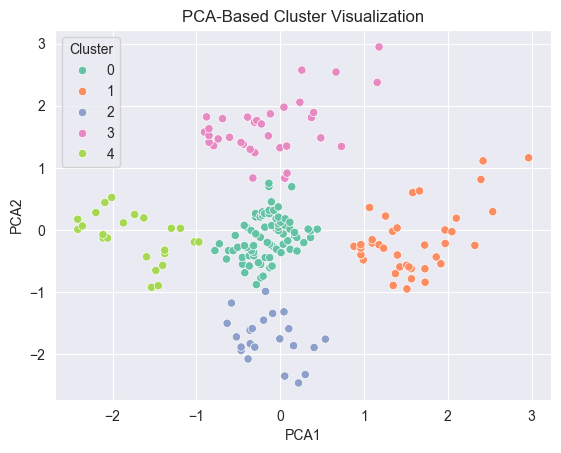

In [17]:
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    data=df,
    palette="Set2"
)
plt.title("PCA-Based Cluster Visualization")
plt.show()


6.3 t-SNE Visualization

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df["TSNE1"] = X_tsne[:, 0]
df["TSNE2"] = X_tsne[:, 1]


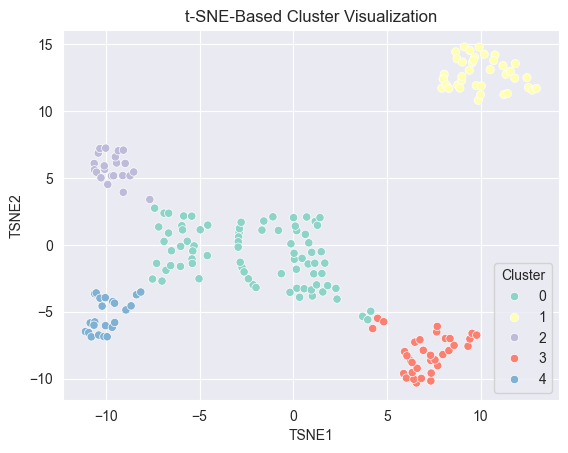

In [19]:
sns.scatterplot(
    x="TSNE1",
    y="TSNE2",
    hue="Cluster",
    data=df,
    palette="Set3"
)
plt.title("t-SNE-Based Cluster Visualization")
plt.show()


# 7. Insights and Marketing Strategies

Based on the clustering results, we can identify the following customer segments and strategies:

**Cluster 0: High Income, High Spending**
- Offer premium products, loyalty programs, and VIP events.

**Cluster 1: High Income, Low Spending**
- Highlight value-for-money products and personalized offers.

**Cluster 2: Low Income, High Spending**
- Provide promotions, discounts, and seasonal trendy products.

**Cluster 3: Low Income, Low Spending**
- Focus on affordable products, bundle deals, and loyalty points.

**Cluster 4: [If applicable]**
- Suggest strategies based on specific characteristics of this cluster.


Conclusion and Insights

K-Means clustering revealed distinct customer segments based on spending habits and demographics. High-spending customers can be targeted with premium offers, while low-spending groups benefit from discounts or value promotions. Tailoring marketing strategies for each segment enables better customer engagement, loyalty, and revenue growth.